# STATS 207 Intro to Time Series Analysis
https://www.stat.pitt.edu/stoffer/tsa4/

In [1]:
#install.packages("devtools")     # only need to do this once
devtools::install_github("nickpoison/astsa","TTR")

In [2]:
library(astsa)
library(ggplot2)
library(tidyr)
library(xts)
library(stringr)

Warning message:
“package ‘xts’ was built under R version 3.5.2”Loading required package: zoo
Warning message:
“package ‘zoo’ was built under R version 3.5.2”
Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Warning message:
“package ‘stringr’ was built under R version 3.5.2”

## Chapter 1

In [7]:
path_to_figures = "~/Dropbox/Apps/Overleaf/STATS 207 L1(presentation)/figures/"

savefig.1 <- function(folder, filename, width = 1024, height = 768)
{
    dev.print(png, paste(folder, filename, sep=""), width=width, height=height)
}

savefig <- function(folder, filename)
{
    dev.copy(png, paste(folder, filename, sep=""))
    dev.off()
}

#### Example 1.1

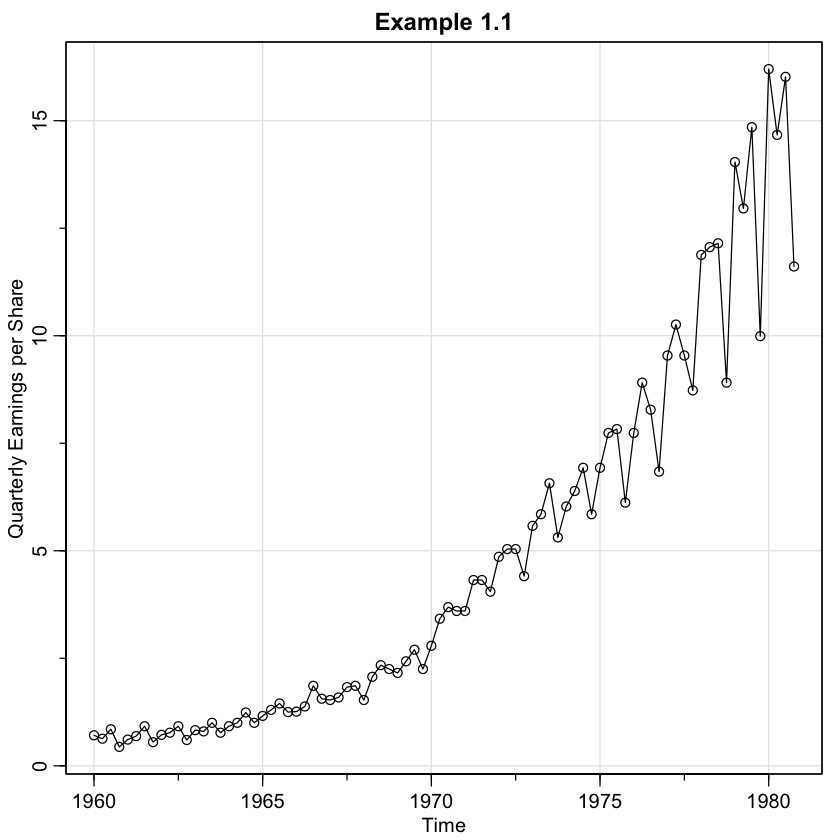

In [105]:
filename = "jj.png"
tsplot(jj, type="o", ylab="Quarterly Earnings per Share", main="Example 1.1")

#### Example 1.2

pdf 
  2

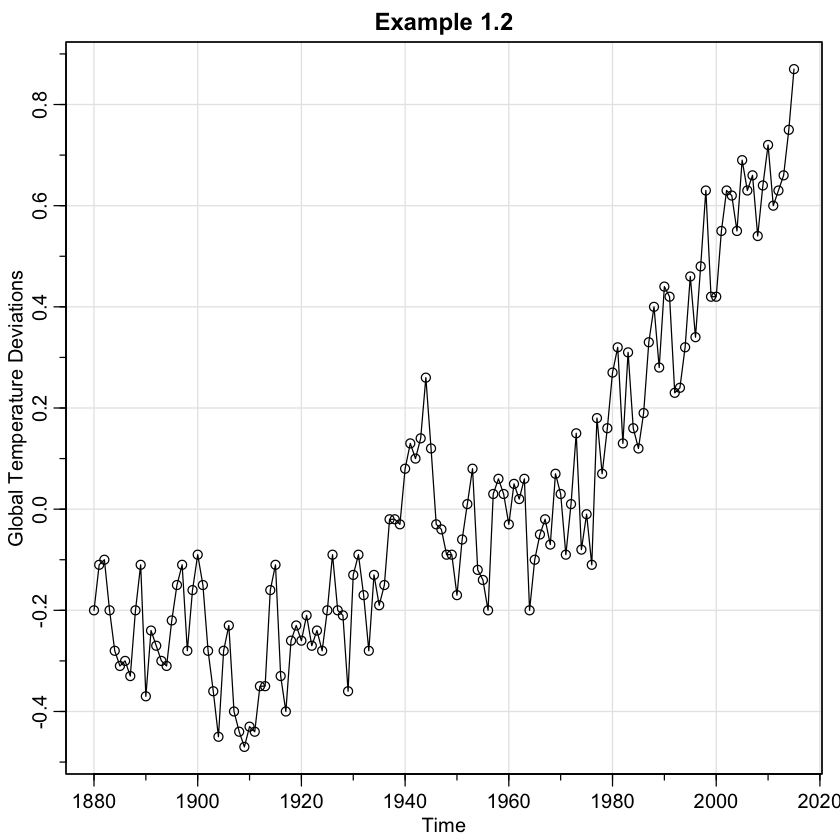

In [21]:
tsplot(globtemp, type="o", ylab="Global Temperature Deviations", main='Example 1.2')
savefig(path_to_figures, 'globtemp1.png')


#### Example 1.3

pdf 
  2

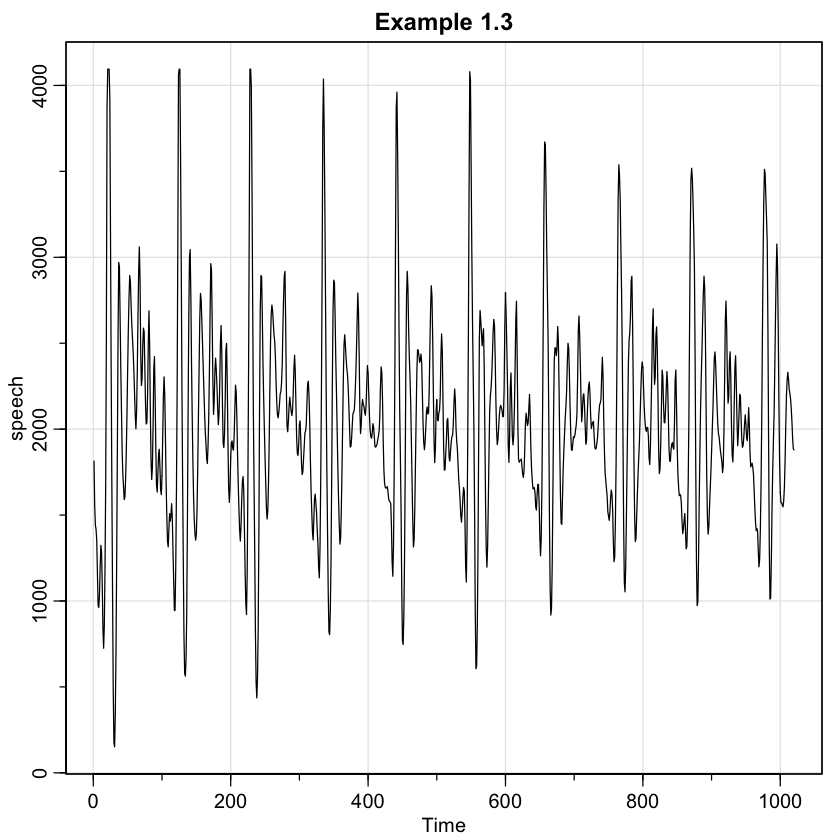

In [22]:
tsplot(speech, main = "Example 1.3")
savefig(path_to_figures, 'speech.png')

#### Example 1.4

pdf 
  2

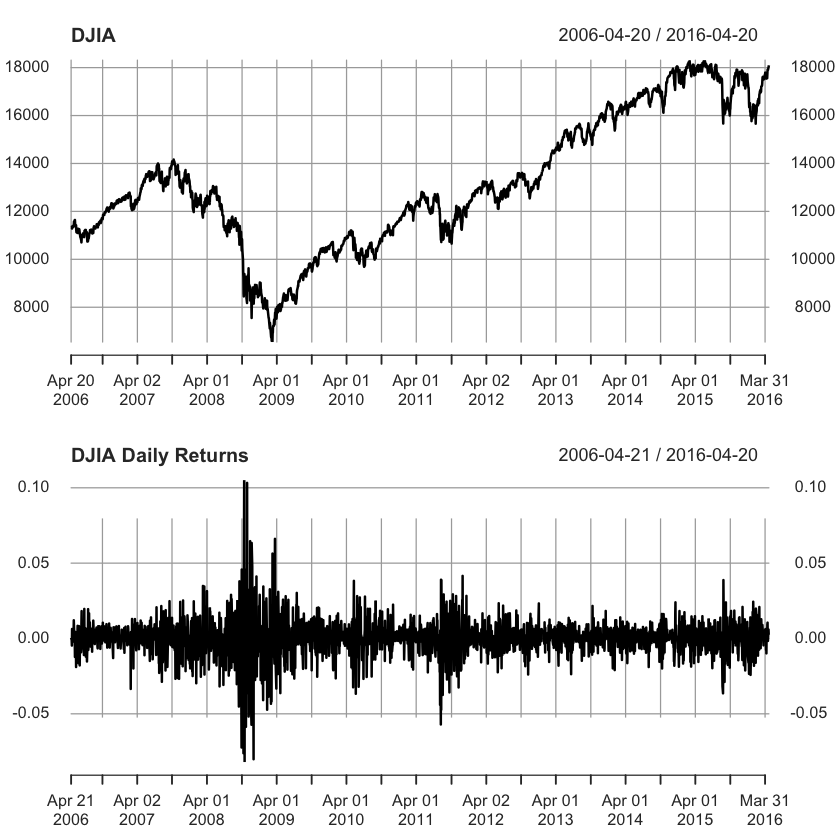

In [23]:
############################################################################
## the lines below are in the text but they don't work anymore ...    
##  ... but the data set djia is included in astsa        
## library(TTR)                                                              
## djia  = getYahooData("^DJI", start=20060420, end=20160420, freq="daily") 
############################################################################
library(TTR)
library(xts)
par(mfrow = c(2,1))  # set up the graphics# this must be here
plot(djia$Close, main="DJIA")

djiar = diff(log(djia$Close))[-1]         # approximate returns
plot(djiar, main="DJIA Daily Returns")  
#lines(djiar) 
savefig(path_to_figures, 'djia.png')

In [ ]:
#Example 1.5
par(mfrow = c(2,1))  # set up the graphics
tsplot(soi, ylab="", main="Southern Oscillation Index")
tsplot(rec, ylab="", main="Recruitment") 
savefig(path_to_figures, 'SOI_Rec.png')

In [ ]:
# Example 1.6
par(mfrow=c(2,1), mar=c(3,2,1,0)+.5, mgp=c(1.6,.6,0))  
ts.plot(fmri1[,2:5], col=1:4, ylab="BOLD", xlab="", main="Cortex")
ts.plot(fmri1[,6:9], col=1:4, ylab="BOLD", xlab="", main="Thalamus & Cerebellum")
mtext("Time (1 pt = 2 sec)", side=1, line=2) 
savefig(path_to_figures, "fmri.png")

In [ ]:
# Example 1.7
par(mfrow=c(2,1))
tsplot(EQ5, main="Earthquake")
tsplot(EXP6, main="Explosion")
savefig(path_to_figures, 'sesmic.png')

#### Models

In [ ]:
# Example 1.9
w = rnorm(500,0,1)  # 500 N(0,1) variates
v = filter(w, sides=2, rep(1/3,3))  # moving average
par(mfrow=c(2,1))
tsplot(w, main="white noise")
tsplot(v, ylim=c(-3,3), main="moving average")
savefig(path_to_figures, 'wn_MA.png')

# now try this (not in text):  
dev.new()  # open a new graphic device
ts.plot(w, v, lty=2:1, col=1:2, lwd=1:2)

In [ ]:
#Example 1.10
w = rnorm(550,0,1)  # 50 extra to avoid startup problems
x = filter(w, filter=c(1,-.9), method="recursive")[-(1:50)]
tsplot(x, main="autoregression")
savefig(path_to_figures, 'ar.png')

In [ ]:
#Example 1.11
set.seed(154) # so you can reproduce the results
w = rnorm(200); x = cumsum(w) # two commands in one line
wd = w +.2;    xd = cumsum(wd)
tsplot(xd, ylim=c(-5,55), main="random walk", ylab='')
lines(x, col=4) 
abline(h=0, col=4, lty=2)
abline(a=0, b=.2, lty=2)
savefig(path_to_figures, 'random_walk.png')

In [ ]:
#Example 1.12
cs = 2*cos(2*pi*(1:500)/50 + .6*pi)
w = rnorm(500,0,1)
par(mfrow=c(3,1), mar=c(3,2,2,1), cex.main=1.5)   # help(par) for info
tsplot(cs, ylab="", main = expression(x[t]==2*cos(2*pi*t/50+.6*pi)))
tsplot(cs + w, ylab="", main = expression(x[t]==2*cos(2*pi*t/50+.6*pi)+N(0,1)))
tsplot(cs + 5*w, ylab="", main = expression(x[t]==2*cos(2*pi*t/50+.6*pi)+N(0,25)))
savefig(path_to_figures, 'sin_in_noise.png')

#### Auto and cross correlation

In [ ]:
# Example 1.24
set.seed(2)
x = rnorm(100)
y = lag(x, -5) + rnorm(100)
ccf(y, x, ylab='CCovF', type='covariance')
abline(v=0, lty=2)
text(11, .9, 'x leads')
text(-9, .9, 'y leads')

In [ ]:
# Example 1.27

path_to_figures = "~/Dropbox/Apps/Overleaf/STATS 207 L2/figures/"
acf(speech, 250)
dev.copy(png,paste(path_to_figures,'ACF_speech.png',sep=""))
dev.off()

In [ ]:
# Example 1.28

par(mfrow=c(3,1))
acf1(soi, 48, main="Southern Oscillation Index")
acf1(rec, 48, main="Recruitment")
ccf2(soi, rec, 48, main="SOI vs Recruitment")
dev.copy(png,paste(path_to_figures,'ACF_CCF_SOI_Recruitment.png',sep=""))
dev.off()

### Chapter 2

In [75]:
path_to_figures = "~/Dropbox/Apps/Overleaf/STATS 207 L3/figures/"


Call:
lm(formula = chicken ~ time(chicken))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7411 -3.4730  0.8251  2.7738 11.5804 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -7.131e+03  1.624e+02  -43.91   <2e-16 ***
time(chicken)  3.592e+00  8.084e-02   44.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.696 on 178 degrees of freedom
Multiple R-squared:  0.9173,	Adjusted R-squared:  0.9168 
F-statistic:  1974 on 1 and 178 DF,  p-value: < 2.2e-16


pdf 
  2

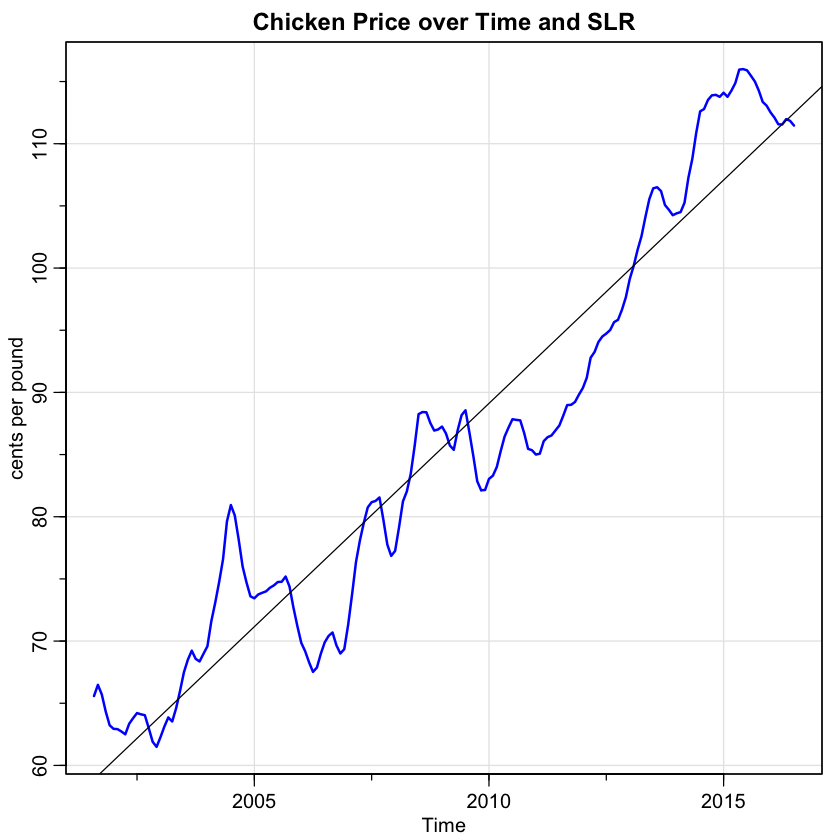

In [37]:
#example 2.1
summary(fit <- lm(chicken~time(chicken))) # regress price on time
tsplot(chicken, ylab="cents per pound", main="Chicken Price over Time and SLR", col=4, lwd=2)
abline(fit)

savefig(path_to_figures, 'chicken_SLR.png')

### Example 2.2

pdf 
  2

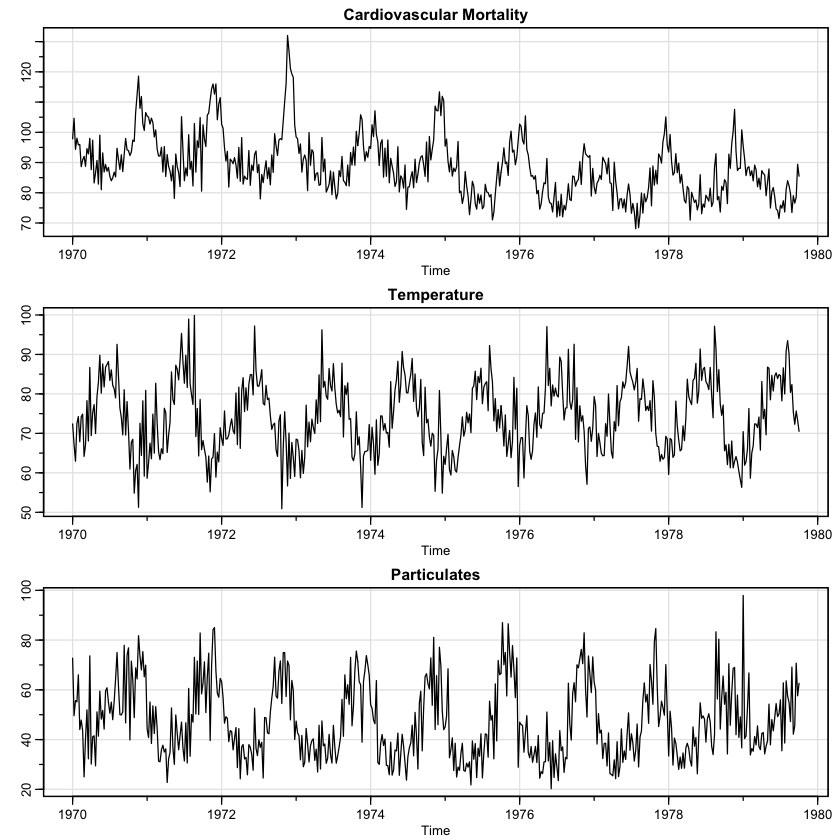

In [55]:
par(mfrow=c(3,1))
tsplot(cmort, main="Cardiovascular Mortality", ylab="")
tsplot(tempr, main="Temperature",  ylab="")
tsplot(part, main="Particulates", ylab="")
savefig(path_to_figures, 'example_2_2.png')


pdf 
  2

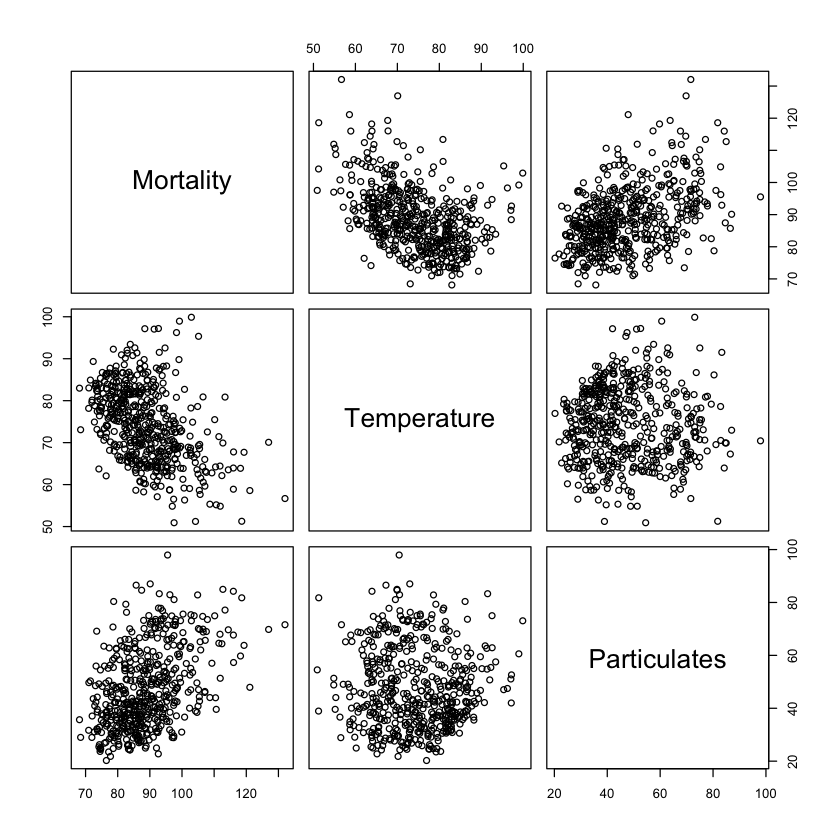

In [57]:
pairs(cbind(Mortality=cmort, Temperature=tempr, Particulates=part))
savefig(path_to_figures, 'example_2_2_pairs.png')


In [82]:
reg.stats = function(fit){
    RSS = sum(fit$residuals^2);
    df = fit$df
    response = fit$fitted.values+fit$residuals
    R.sq = 1 - sum(fit$residuals^2)/sum((response-mean(response))^2);
             model = paste(fit$call)[2]
      MSE = RSS/df
    n = length(fit$residuals)
    k = n - df
    AIC = log(MSE) + (n+2*k)/n
    BIC = log(MSE) + k*log(n)/n
    result = data.frame(k=k,RSS=RSS, df=df, MSE=MSE,
                            R.sq=R.sq, AIC=AIC, BIC=BIC)
    result 
    }

In [83]:
#  Regression
temp  = tempr-mean(tempr)  # center temperature    
temp2 = temp^2             # square it  
trend = time(cmort)        # time

fit.2 = lm(cmort ~ trend)
fit.3 = lm(cmort ~ trend + temp)
fit.4 = lm(cmort ~ trend + temp + temp2)
fit.5 = lm(cmort ~ trend + temp + temp2 + part)

print(rbind(reg.stats(fit.2),reg.stats(fit.3), reg.stats(fit.4),reg.stats(fit.5)))

  k      RSS  df      MSE      R.sq      AIC      BIC
1 2 40019.84 506 79.09059 0.2104470 5.378468 4.395123
2 3 31413.21 505 62.20438 0.3802474 5.142236 4.167220
3 4 27984.53 504 55.52486 0.4478921 5.032579 4.065890
4 5 20508.44 503 40.77225 0.5953881 4.727687 3.769325


### Example 2.4

### Example 2.8

[1]  0.60  0.37  0.21  0.05 -0.11 -0.19 -0.18 -0.10  0.05  0.22  0.36  0.41
[13]  0.31  0.10 -0.06 -0.17 -0.29 -0.37 -0.32 -0.19 -0.04  0.15  0.31  0.35
[25]  0.25  0.10 -0.03 -0.16 -0.28 -0.37 -0.32 -0.16 -0.02  0.17  0.33  0.39
[37]  0.30  0.16  0.00 -0.13 -0.24 -0.27 -0.25 -0.13  0.06  0.21  0.38  0.40

pdf 
  2

[1]  0.60  0.37  0.21  0.05 -0.11 -0.19 -0.18 -0.10  0.05  0.22  0.36  0.41
[13]  0.31  0.10 -0.06 -0.17 -0.29 -0.37 -0.32 -0.19 -0.04  0.15  0.31  0.35
[25]  0.25  0.10 -0.03 -0.16 -0.28 -0.37 -0.32 -0.16 -0.02  0.17  0.33  0.39
[37]  0.30  0.16  0.00 -0.13 -0.24 -0.27 -0.25 -0.13  0.06  0.21  0.38  0.40

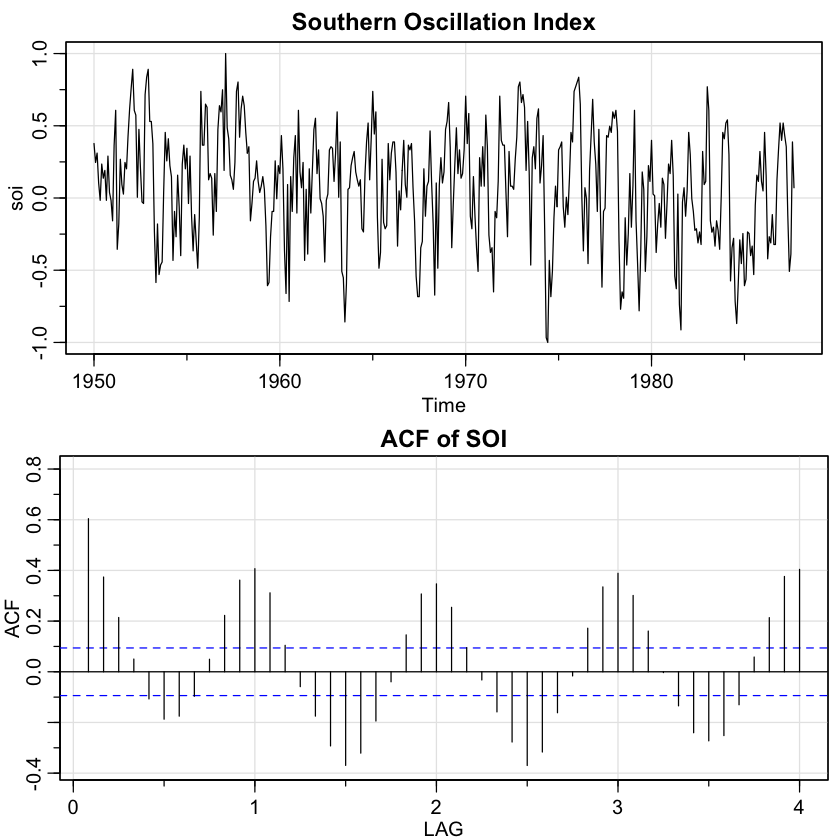

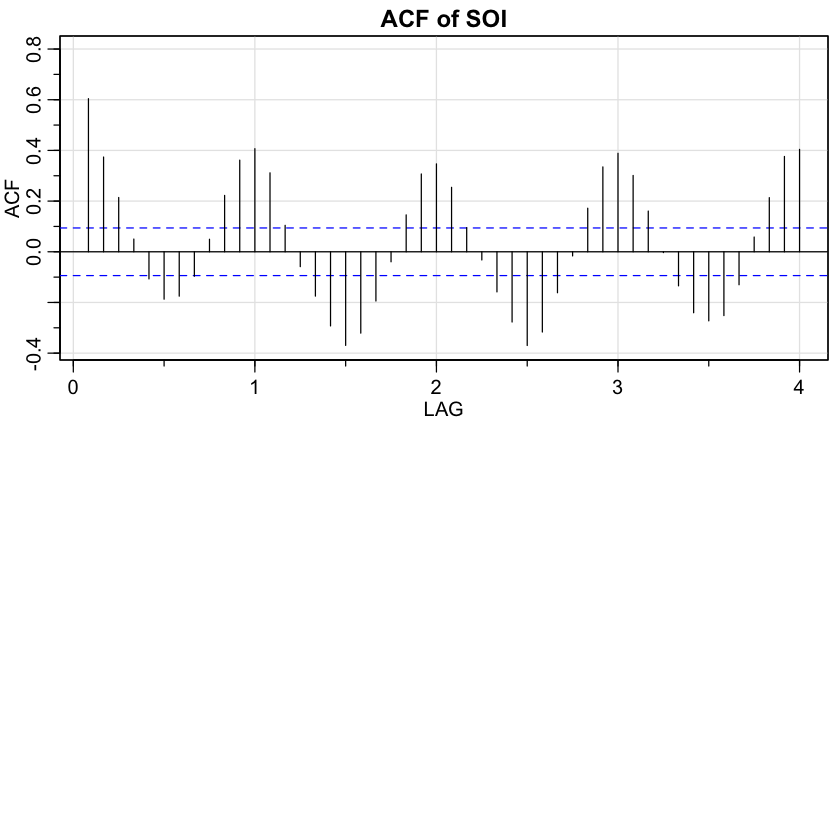

pdf 
  2

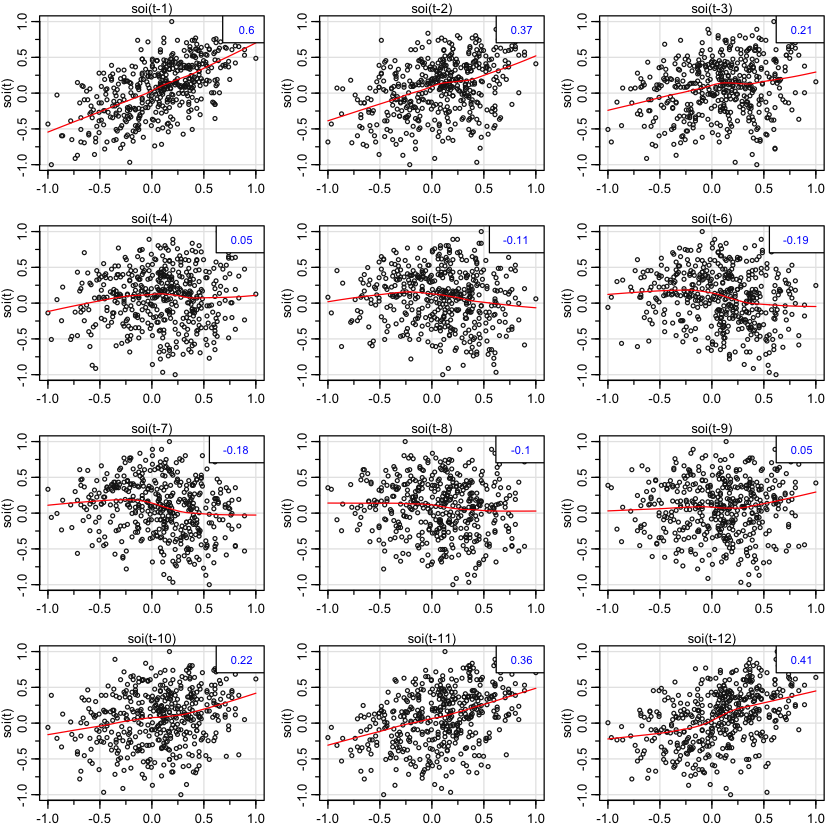

pdf 
  2

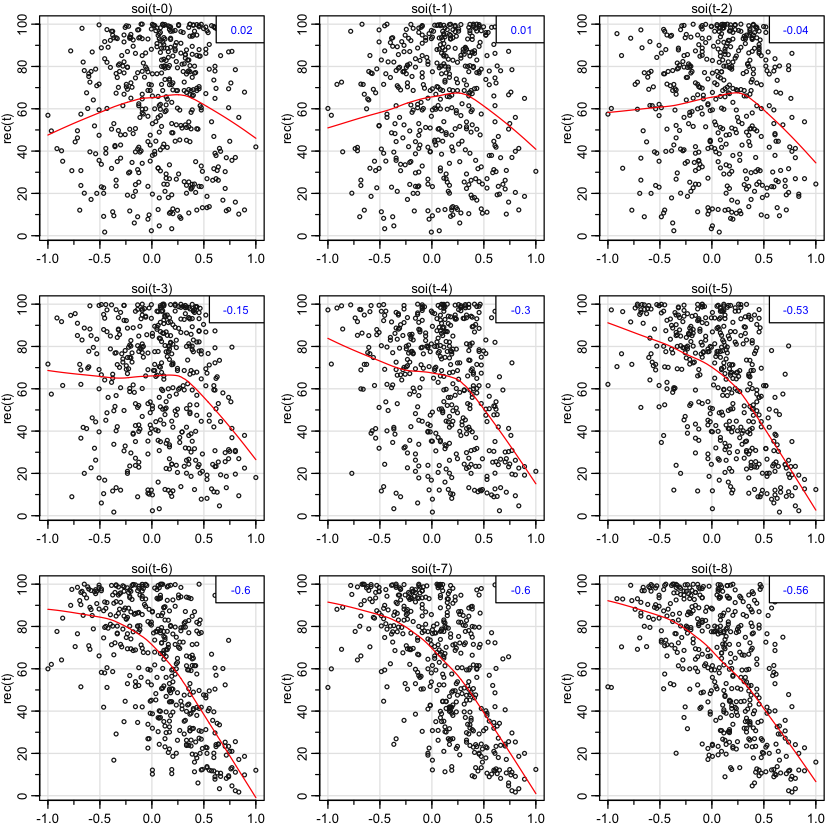

In [84]:
par(mfcol = c(2,1))
tsplot(soi, main="Southern Oscillation Index")
acf1(soi, 48, main="ACF of SOI")
#lag1.plot(soi, 12)
savefig(path_to_figures, "SOI_ACF.png")

par(mfcol = c(2,1))
#tsplot(soi, main="Southern Oscillation Index")
acf1(soi, 48, main="ACF of SOI")
lag1.plot(soi, 12)
savefig(path_to_figures, "SOI_ACF_pairs.png")

lag2.plot(soi, rec, 8) # Figure 2.9
savefig(path_to_figures, "SOI_REC_pairs.png")

### Example 2.10


Call:
lm(formula = x ~ 0 + z1 + z2)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6589  -3.0872   0.1508   3.1302  13.5821 

Coefficients:
   Estimate Std. Error t value Pr(>|t|)    
z1  -0.7083     0.2958  -2.394    0.017 *  
z2  -2.5473     0.2958  -8.611   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.678 on 498 degrees of freedom
Multiple R-squared:  0.1382,	Adjusted R-squared:  0.1348 
F-statistic: 39.94 on 2 and 498 DF,  p-value: < 2.2e-16


pdf 
  2

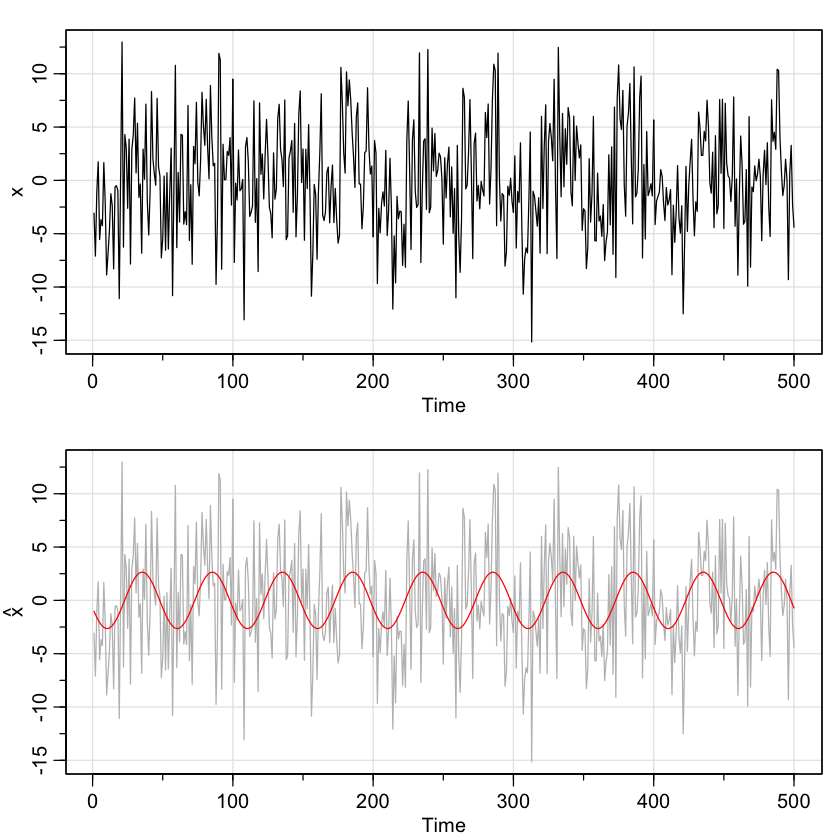

In [10]:
set.seed(1000)  # so you can reproduce these results
x = 2*cos(2*pi*1:500/50 + .6*pi) + rnorm(500,0,5)
z1 = cos(2*pi*1:500/50) 
z2 = sin(2*pi*1:500/50)
summary(fit <- lm(x~0+z1+z2))  # zero to exclude the intercept
par(mfrow=c(2,1))
tsplot(x)
tsplot(x, col=8, ylab=expression(hat(x)))
lines(fitted(fit), col=2)

savefig(path_to_figures, 'sinusoid_in_noise_vis.png')

In [17]:
RS = function(fit){
RSS = sum(fit$residuals^2);
    df = fit$df
    response = fit$fitted.values+fit$residuals
    R.sq = 1 - sum(fit$residuals^2)/sum((response-mean(response))^2);
    R.sq
}

pdf 
  2

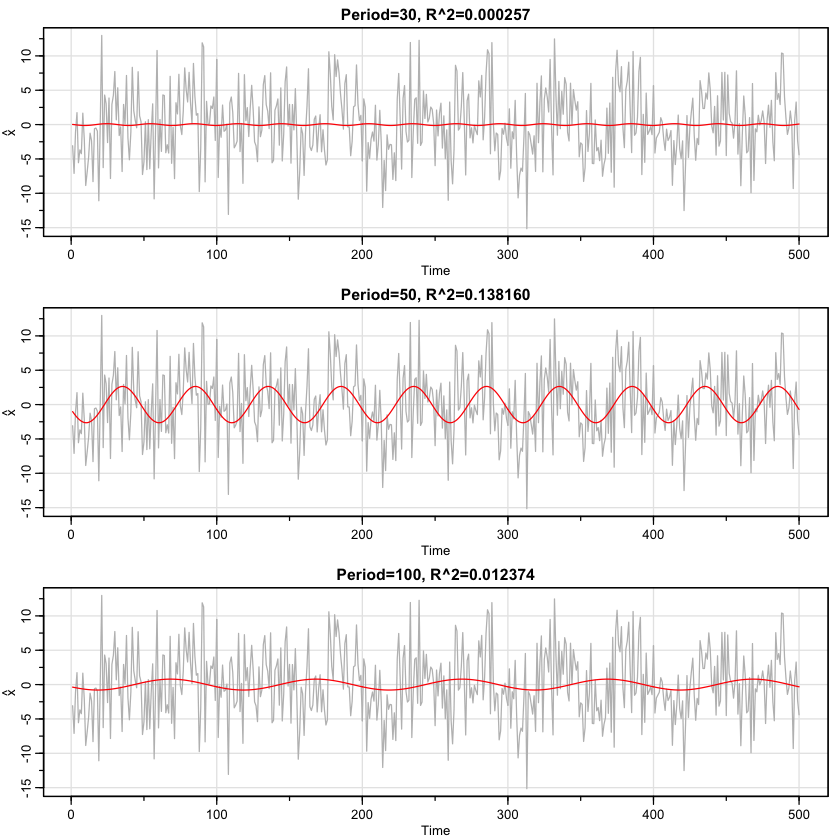

In [24]:
set.seed(1000)  # so you can reproduce these results
x = 2*cos(2*pi*1:500/50 + .6*pi) + rnorm(500,0,5)
par(mfrow=c(3,1))
for(per in c(30,50,100)){
z1 = cos(2*pi*1:500/per) 
z2 = sin(2*pi*1:500/per)
summary(fit <- lm(x~0+z1+z2))  # zero to exclude the intercept
tsplot(x, col=8, ylab=expression(hat(x)), main = sprintf('Period=%d, R^2=%f',per, RS(fit)))
lines(fitted(fit), col=2)
}

savefig(path_to_figures, 'period_trail_and_error.png')

In [32]:
librat(GeneTS)

Warning message:
“package ‘GeneTS’ is not available (for R version 3.5.1)”

Warning message in plot.xy(xy, type, ...):
“plot type 'ol' will be truncated to first character”Warning message in dev.copy(png, paste(folder, filename, sep = "")):
“plot type 'ol' will be truncated to first character”

pdf 
  2

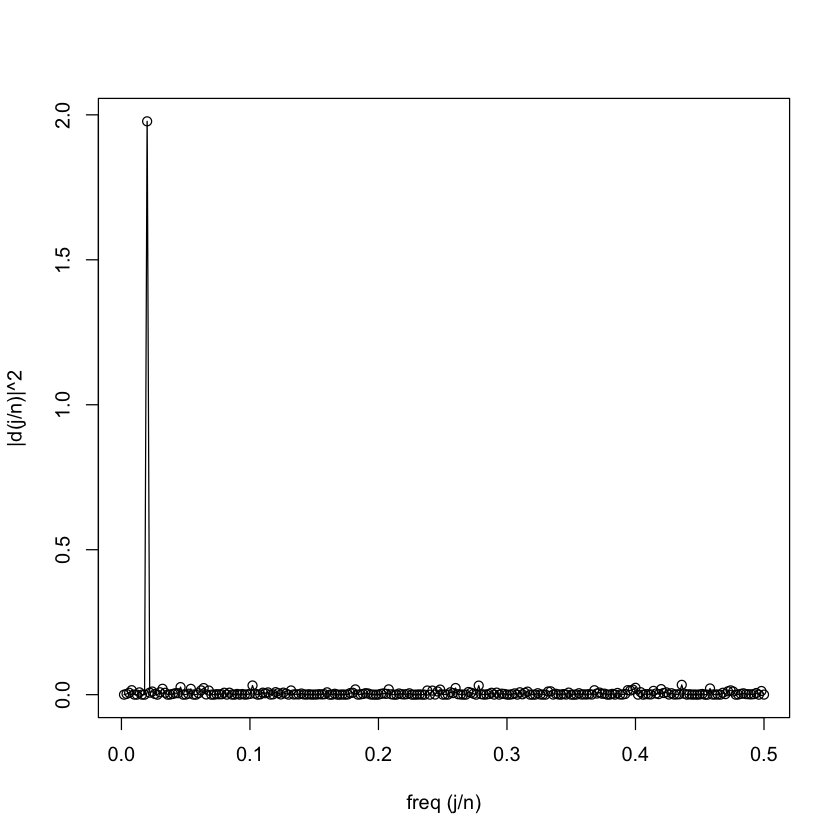

In [57]:
x = 2*cos(2*pi*1:500/50 + .6*pi) + rnorm(500,0,5)
s = spectrum(x, plot=FALSE)
plot(s$freq, abs(s$spec/500)^2, ylab="|d(j/n)|^2", type="ol", xlab='freq (j/n)')
savefig(path_to_figures, "periodogram.png")

## Prophet

In [26]:
!wget "https://github.com/facebook/prophet/blob/master/examples/example_wp_log_peyton_manning.csv"

ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected string constant
1: !wget "https://github.com/facebook/prophet/blob/master/examples/example_wp_log_peyton_manning.csv"
          ^


### M5

In [ ]:
dt <- read.csv("~/Downloads/m5-forecasting-accuracy/sales_train_evaluation.csv")

In [61]:
? time